# Optimization Methods
- We've always used Gradient Descent to update the parameters and minimize the cost. 
- We'll be able to : 
    - Apply optimization methods such as (Stochastic) Gradient Descent, Momentum, RMSProp and Adam.
    - Use random minibathces to accelerate convergence and improve optimizaton.
- Gradient descent goes downhill on a cost function J. At each step of the training, we update our parameters following a certain direction to try to get to the lowest possible point.

# 1. Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import math
import sklearn
import sklearn.datasets

# 2. Gradient Descent
- A simple optimization method in machine learning is Gradient Descent (GD). When we take gradient steps with respect to all m examples on each step, it is called Batch Gradient Descent
- Implement the gradient descent update rule. The gradient descent rule is, for l = 1, 2, ....L.
    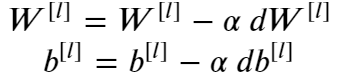
- Where L is the number of layers and alpha is the learning rate. All parameters should be stored in the parameters dictionary. Note that the iterator l starts at 1 in the for loop as the first parameters are W[1] and b[1]

In [2]:
def update_parameters_with_gd(parameters, grads, learning_rate):
    '''
    Update parameters using one step of gradient descent
    
    Arguments:
    Parameters : Python dictionary containing our parameters to be updated : 
                    parameters['W' + str(l)] = W1
                    parameters['b' + str(l)] = b1
    grads : Python dictionary containing our gradients to update each parameters:
                    grads['dw' + str(l)] = dW1
                    grads['db' + str(l)] = db1
    learning_rate : The learning rate, scalar.
    
    Returns : 
    parameters : Python dictionary containing our updated parameters
    '''
    L = len(parameters) // 2 # number of layers in the neural networks

    # Update rule for each parameter
    for l in range(1, L + 1):
        parameters["W" + str(l)] =  parameters["W" + str(l)] - learning_rate*grads['dW' + str(l)]
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate*grads['db' + str(l)]
        
    return parameters
    

- A variant of this is Stochastic Gradient Descent (SGD), which is equivalent to mini-batch gradient descent, where each mini-batch has just 1 example. The update rule that we have just implemented does not change. What changes is that we would be computing gradients on just one training example at a time, rather than on the whole training set. 
#### (Batch) Gradient Decent
- X = data_input
- Y = labels
- m = X.shape[1] # Numbert of training examples
- parameter = initialize_parameters(layers_dims)
- for i in range(0, num_iterations):
    - #forward propagation
    - a, caches = forward_propagation(X, parameters)
    - #compute cost
    - cost_total = compute_cost(a, Y)
    - #backward propagation
    - grads = backward_propagation(a, caches, parameters)
    - #update parameters
    - parameters = update_parameters(parameters, grads)
    - #compute average cost
    - cost_avg = cost_total / m
    
#### Stochastic Gradient Descent
- X = data_input
- Y = labales
- m = X.shape[1] #number of training examples
- parameters = initialize_parameters(layers_dims)
- for i in range(0, num_iterations):
    - cost_total = 0
    - for j in range(0, m):
        - #Forward Propagation
        - a, caches = forward_propagation(X[:, j], parameters)
        - #Compute cost
        - cost_total += compute_cost(a, Y[:, j]) # Cost for one training example
        - #Backward propagation
        - grads = backward_propagation(a, caches, parameters)
        - #update parameters
        - parameters = update_parameters(parameters, grads)
    - #compute average cost
    - cost_avg = cost_total / m
- In Stochastic Gradient Descent, we use only 1 training example before updating the gradients. When the training set is large SGD can be faster. But the parameters will 'osciallate' towards the minimum rather than converge smoothly. 
- 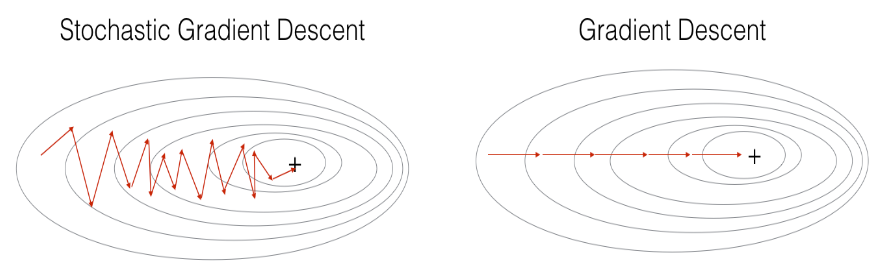
- SGD leads to many osciallations to reach convergence, but each step is a lot faster to compute for SGD than it is for GD, as it uses only one training example (vs the whole batch for GD).
- Implementing SGD requires 3 for loops in total
    - Over the number of iterations
    - Over the m training examples
    - Over the layers (to update all parameters from (W[1], b[1]) to (W[l], b[l])).
- We'll often gets faster results if we don't use the entire training set or just one training example, to perform each update. Mini-batch gradient descent uses an intermediate number of examples for each step. With mini-batch gradient descent, we loop over the mini-batches instead of looping over individual training examples.
- 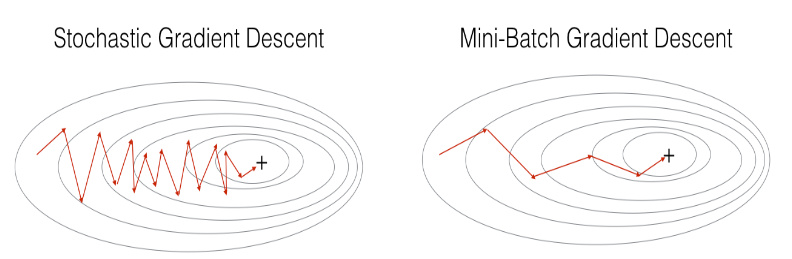
- Using mini-batches in our optimization algorithm often leads to faster optimization.

# 3. Mini-Batch Gradient Descent
- We'll build some mini-batches from the training set(X, Y).
- There are 2 steps : 
    1. Shuffle : Create a shuffled version of the training set (X, Y). Each column of X and Y represents a training example. Note that the randsom shuffling is done synchronosly b/w X and Y. Such that after the shuffling the ith column of X is the example corresponding to the ith label in Y. The shuffling step ensures that examples will be split randomly into different mini-batches.
    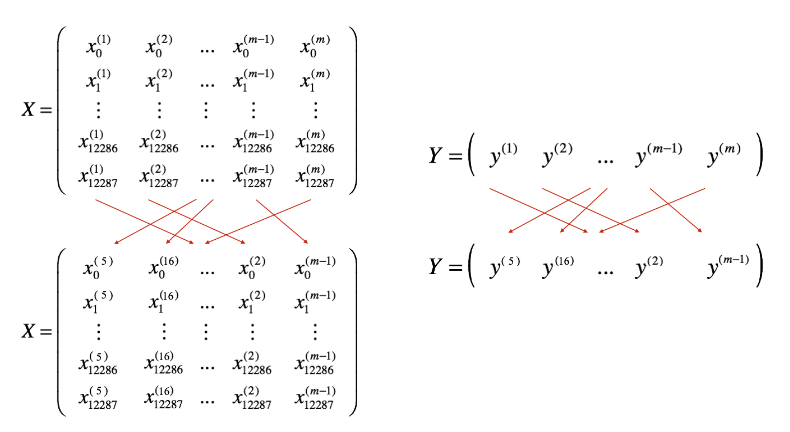
    2. Partition : Partition the shuffled (X, Y) into mini-batches of size mini_batch_size (64). Note that the number of training examples is not always divisible by mini_batch_size. The last mini batch might be smaller, but we don't need to worry about this. When the finial mini-batch is smaller than the full mini_batch_size, it will look like 
    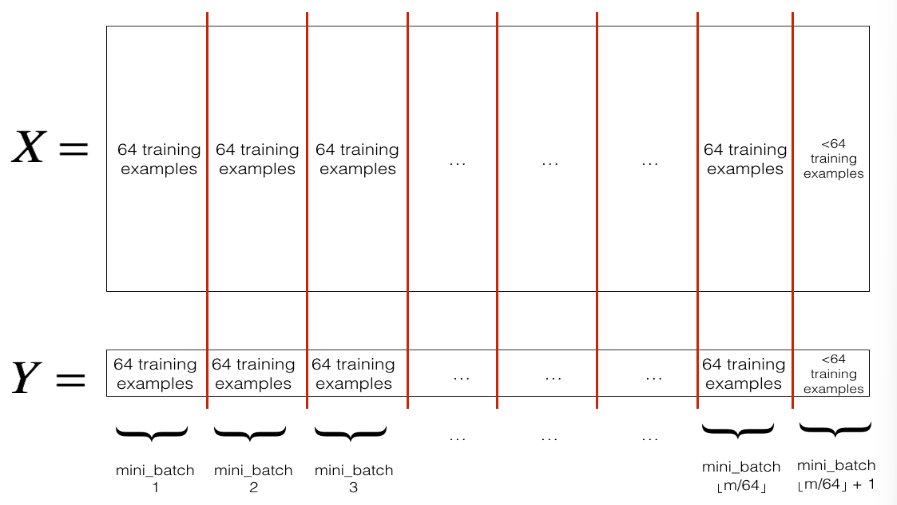
- The shuffling part that selects the indexes for the 1st and 2nd mini-batches
    - first_mini_batch_X = shuffled_X[:, 0 : mini_batch_size]
    - second_mini_batch_Y = shuffled_X[:, mini_batch_size : 2*mini_batch_size]

In [3]:
def random_mini_batches(X, Y, mini_batches_size = 64, seed = 0):
    '''
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X : Input data, of shape (input size, number of examples)
    Y : True 'label' vector (1 for blue fot /  0 for red dot), of shape (1, number of examples)
    mini_batch_size : Size of the mini-batches, integer
    
    Returns :
    mini_batches : List of synchronous (mini_batch_X, mini_batch_Y)
    '''
    
    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[1]                  # number of training examples
    mini_batches = []
        
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1, m))
    
    inc = mini_batch_size

    # Step 2 - Partition (shuffled_X, shuffled_Y).
    # Cases with a complete mini batch size only i.e each of 64 examples.
    num_complete_minibatches = math.floor(m / mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        # (approx. 2 lines)
        mini_batch_X = shuffled_X[:, k*mini_batch_size: (k+1)*mini_batch_size] 
        mini_batch_Y = shuffled_Y[:, k*mini_batch_size : (k+1)*mini_batch_size] 
        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # For handling the end case (last mini-batch < mini_batch_size i.e less than 64)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, (num_complete_minibatches*mini_batch_size): m ]
        mini_batch_Y = shuffled_Y[:, (num_complete_minibatches*mini_batch_size): m ]
        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches
    

In [4]:
np.random.seed(1)
mini_batch_size = 64
nx = 12288
m = 148
X = np.array([x for x in range(nx * m)]).reshape((m, nx)).T
Y = np.random.randn(1, m) < 0.5

mini_batches = random_mini_batches(X, Y, mini_batch_size)
n_batches = len(mini_batches)
n_batches

3

- Shuffling and Partitioning are the 2 steps required to build mini-batches
- Powers of 2 are often chosen to be the mini-batch size e.g : 16, 32, 63, 128.

# 4. Momentum
- Because mini-batch gradient descent makes a parameter update after seeing just a subset of examples, the direction of the update has some variance, and so the path taken by mini-btch gradient descent will oscillate toward convergence. Using momentum can reduce these osciallations
- Momentum takes into account the past gradients to smooth out the update. The 'direction' of the previous gradients is stored in the variable v. Formally, this will be the exponentially weighted average of the gradient on previous steps. We can also think of v as the 'velocity' of a ball rolling downhill, building up speed (and momentum) according to the direction of the gradient/slope of the hill.
    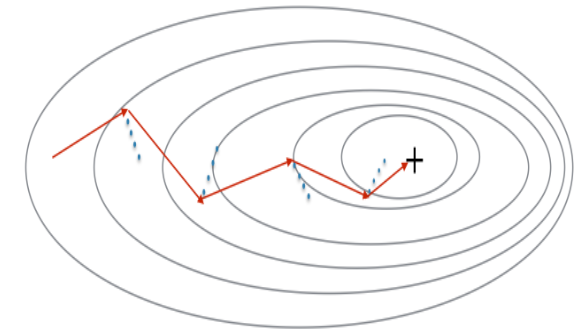

In [38]:
def initialize_velocity(parameters):
    """
    Initializes the velocity as a python dictionary with:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    
    Returns:
    v -- python dictionary containing the current velocity.
                    v['dW' + str(l)] = velocity of dWl
                    v['db' + str(l)] = velocity of dbl
    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    
    # Initialize velocity
    for l in range(1, L + 1):
        # (approx. 2 lines)
        v["dW" + str(l)] = np.zeros(parameters['W' + str(l)].shape)
        v["db" + str(l)] = np.zeros(parameters['b' + str(l)].shape)
        
    return v

- Now implewment the parameters update with momentum. The momentum update rule is, for l = 1,..l
    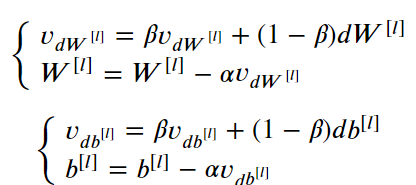
- Where L is the number of layer, Beta is the momentum and alpha is the learning rate. All parameters should be stored in the parameters dictionary. Note that the iterator l starts at 1 in for loop as the first parameters are W[1] and b[1].

In [46]:
def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):
    '''
    Update parameters using Momentum
    
    Arguments : 
    parameters : Python dictionary containing our parameters
                parameters['W' + str(l)] = W1
                parameters['b' + str(l)] = b1
    grads : Python dictionary containing our gradients for each parameters
                grads['dW' + str(l)] = dW1
                grads['db' + str(l)] = db1
    v : Python dictionary containing the current velocity
                v['dW' + str(l)] =
                v ['db' + str(l)] =
    beta : The momentum hyperparameter, scalar
    learning_rate : The learning rate, scalar
    
    Returns : 
    parameters : Python dictionary containing our updated parameters
    v : Python dictionary containing our updated velocities
    '''
    L = len(parameters) // 2 # number of layers in the neural networks
    
    # Momentum update for each parameter
    for l in range(1, L + 1):
        # compute velocities
        v["dW" + str(l)] = beta*v['dW' + str(l)] + (1-beta)*grads['dW' + str(l)]
        v["db" + str(l)] = beta*v['db' + str(l)] + (1-beta)*grads['db' + str(l)]
        # update parameters
        parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate*v["dW" + str(l)]
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate*v["db" + str(l)]
        
    return parameters, v
    

- The velocity is initialized with zeros. So the algorithm will take a few iterations to 'build up' velocity and start to take bigger steps.
- If beta = 0, then this becomes standard gradient descent without momentum.
#### How to choose beta?
- The larger the momentum beta is, the smoother the update, because it takes the past gradients into account more. But if beta is too big, it could also smoothe out the updates too much.
- Common values for beta ranges from 0.8 to 0.999. If we don't fee inclined to tune this, beta = 0.9 is often a reasonable default.
- Tuning the optimal beta for our model might require trying several values to see what works best in terms of reducing the value of the cost function J.
- Momentum takes past gradients into account to smooth out the steps of gradient descent. It can be appied with batch gradient descent, mini-batch gradient descent ot stochastic gradient descent.
- We have to tune a momentum hyperparameter beta and learning rate alpha

# 5. Adam
- Adam is one of the most effective optimization algorithms for training neural networks. It combines idead from RMSProp and Momentum.
- How does Adam work?
    1. It calculated an exponentially weighted average of past gradients, and stores it in variable v (before bias correction) and v^corrected (with bias correction).
    2. It calculates an exponentially weighted average of the squares of the past gradients, and stores it in variables s (before bias correction) and s^corrected (with bias correction).
    3. It updates parameters in a direction based on combining information from '1' and '2'.
- The update rule is, for l = 1,.., L
    - 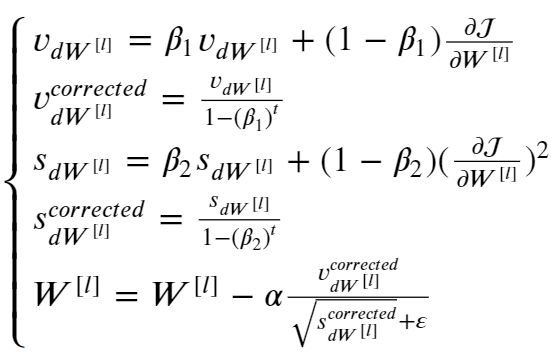
- Where, 
    - t counts the number of steos taken of Adam
    - L is the number of layers
    - beta_1 and beta_2 are hyperparameters that controls the 2 exponentially weighted averages.
    - Alpha is the learning rate
    - Epsilon is a very small number to avoid dividing by zero.
- All parameters are stored in the parameters dictionary.

In [7]:
def initialize_adam(parameters):
    '''
    Initialize v and s as 2 python dictionaries with :
        - keys : 'dW1', 'db1',...'dWL', 'dbL'
        - values : numpy array of zeros of the same shape as the corresponding gradients/parameters.
        
    Arguments : 
    parameters : Python dictionary containing our parameters.
        parameters['W' + str(l)] = Wl
        parameters['b' + str(l)] = bl
    
    Returns : 
    v : Python dictionary that will contain the exponentially weighted average of the gradient. Initialize with zeros.
        v['dW' + str(l)] = 
        v['db' + str(l)] = 
    s : Python dictionary that will contain the exponentially weighted average of the squared gradient. Initialized with zeros.
        s['dW' + str(l)] = 
        s['db' + str(l)] = 
    '''
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    s = {}
    
    # Initialize v, s. Input: "parameters". Outputs: "v, s".
    for l in range(1, L + 1):
        v["dW" + str(l)] = np.zeros(parameters['W' + str(l)].shape)
        v["db" + str(l)] = np.zeros(parameters['b' + str(l)].shape)
        s["dW" + str(l)] = np.zeros(parameters['W' + str(l)].shape)
        s["db" + str(l)] = np.zeros(parameters['b' + str(l)].shape)
    
    return v, s

- Now, implement the parameters update with Adam. Recall the general update rule is, for l = 1, ....,L
    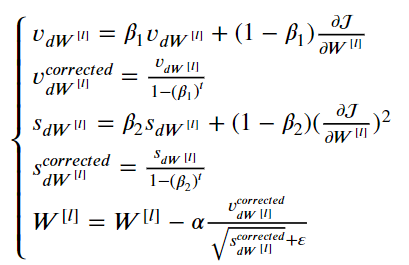

In [51]:
def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                 beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8):
    '''
    Update parameters using Adam
    
    Arguments :
    parameters : Python dictionary containing our parameters
                parameters['W' + str(l)] = W1
                parameters['b' + str(l)] = b1
    grads : Python dictionary containing our gradients for each parameters:
                 grads['dW' + str(l)] = dW1
                 grads['db' + str(l)] = db1
    v : Adam variable, moving average of the first gradient, python dictionary.
    s : Adam variable, moving average of the squared gradient, python dictionary.
    t : Adam variable, counts the number of taken steps.
    learning_rate : The learning rate, scalar.
    beta1 : Exponential decay hyperparameter for the first moment estimates.
    beta2 : Exponential decay hyperparameter for the second estimates.
    epsilon : Hyperparameter preventing division by zero in Adam updates.
    
    Returns :
    parameters : Python dictionary containing our updated parameters
    v : Adam variable, moving average of the first gradient, python dictionary
    s : Adam variable, moving average of the squared gradient, python dictionary
    '''
    
    L = len(parameters) // 2                 # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary
    
    # Perform Adam update on all parameters
    for l in range(1, L + 1):
        # Moving average of the gradients. Inputs: "v, grads, beta1". Output: "v".
        v["dW" + str(l)] = beta1*v["dW" + str(l)] + (1-beta1)*(grads['dW' + str(l)])
        v["db" + str(l)] = beta1*v["db" + str(l)] + (1-beta1)*(grads['db' + str(l)])

        # Compute bias-corrected first moment estimate. Inputs: "v, beta1, t". Output: "v_corrected".
        v_corrected["dW" + str(l)] = v["dW" + str(l)] * (1/(1-beta1**t))
        v_corrected["db" + str(l)] = v["db" + str(l)] * (1/(1-beta1**t))

        # Moving average of the squared gradients. Inputs: "s, grads, beta2". Output: "s".
        s["dW" + str(l)] = beta2*s["dW" + str(l)] + (1-beta2)*(grads['dW' + str(l)]**2)
        s["db" + str(l)] = beta2*s["db" + str(l)] + (1-beta2)*(grads['db' + str(l)]**2)

        # Compute bias-corrected second raw moment estimate. Inputs: "s, beta2, t". Output: "s_corrected".
        s_corrected["dW" + str(l)] = s["dW" + str(l)]*(1/(1-beta2**t))
        s_corrected["db" + str(l)] = s["db" + str(l)]*(1/(1-beta2**t))

        # Update parameters. Inputs: "parameters, learning_rate, v_corrected, s_corrected, epsilon". Output: "parameters".
        parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate*(v_corrected["dW" + str(l)]/(np.sqrt(s_corrected["dW" + str(l)]) + epsilon) )
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate*(v_corrected["db" + str(l)]/(np.sqrt(s_corrected["db" + str(l)]) + epsilon) )

    return parameters, v, s, v_corrected, s_corrected

- We have 3 working optimization algorithms (mini-batch gradient descent, momentum, Adam). Let's implement a model with each of these optimizers.

# 6. Model with different Optimization algorithms
-  We'll use the following 'moons' dataset to test the different optimization methods.

In [9]:
def load_dataset():
    np.random.seed(3)
    train_X, train_Y = sklearn.datasets.make_moons(n_samples=300, noise=.2) #300 #0.2 
    # Visualize the data
    plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);
    train_X = train_X.T
    train_Y = train_Y.reshape((1, train_Y.shape[0]))
    
    return train_X, train_Y

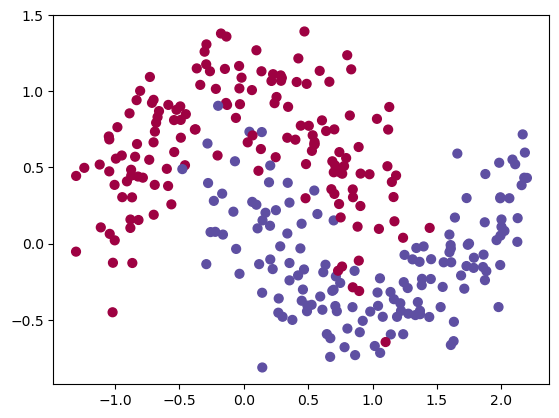

In [10]:
train_X, train_Y = load_dataset()

- A 3 layer neural network : 
    - Mini-batch Gradient Descent : It will call function
        - update_parameters_with_gd()
    - Mini-batch Momentum : It will call our functions:
        - initialize_velocity() and update_parameters_with_momentum()
    - Mini-batch Adam : It will call our functions :
        - initialize_adam() and update_parameters_with_adam()

In [25]:
def initialize_parameters(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    b1 -- bias vector of shape (layer_dims[l], 1)
                    Wl -- weight matrix of shape (layer_dims[l-1], layer_dims[l])
                    bl -- bias vector of shape (1, layer_dims[l])
                    
    Tips:
    - For example: the layer_dims for the "Planar Data classification model" would have been [2,2,1]. 
    This means W1's shape was (2,2), b1 was (1,2), W2 was (2,1) and b2 was (1,1). Now you have to generalize it!
    - In the for loop, use parameters['W' + str(l)] to access Wl, where l is the iterative integer.
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*  np.sqrt(2 / layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert parameters['W' + str(l)].shape[0] == layer_dims[l], layer_dims[l-1]
        assert parameters['W' + str(l)].shape[0] == layer_dims[l], 1
        
    return parameters

In [11]:
def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

def relu(x):
    """
    Compute the relu of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- relu(x)
    """
    s = np.maximum(0,x)
    
    return s

In [19]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation (and computes the loss) presented in Figure 2.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape ()
                    b1 -- bias vector of shape ()
                    W2 -- weight matrix of shape ()
                    b2 -- bias vector of shape ()
                    W3 -- weight matrix of shape ()
                    b3 -- bias vector of shape ()
    
    Returns:
    loss -- the loss function (vanilla logistic loss)
    """
    
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    z1 = np.dot(W1, X) + b1
    a1 = relu(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = relu(z2)
    z3 = np.dot(W3, a2) + b3
    a3 = sigmoid(z3)
    
    cache = (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3)
    
    return a3, cache

In [20]:
def compute_cost(a3, Y):
    
    """
    Implement the cost function
    
    Arguments:
    a3 -- post-activation, output of forward propagation
    Y -- "true" labels vector, same shape as a3
    
    Returns:
    cost - value of the cost function without dividing by number of training examples
    
    Note: 
    This is used with mini-batches, 
    so we'll first accumulate costs over an entire epoch 
    and then divide by the m training examples
    """
    
    logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
    cost_total =  np.sum(logprobs)
    
    return cost_total

In [21]:
def backward_propagation(X, Y, cache):
    """
    Implement the backward propagation presented in figure 2.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat)
    cache -- cache output from forward_propagation()
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    m = X.shape[1]
    (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache
    
    dz3 = 1./m * (a3 - Y)
    dW3 = np.dot(dz3, a2.T)
    db3 = np.sum(dz3, axis=1, keepdims = True)
    
    da2 = np.dot(W3.T, dz3)
    dz2 = np.multiply(da2, np.int64(a2 > 0))
    dW2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis=1, keepdims = True)
    
    da1 = np.dot(W2.T, dz2)
    dz1 = np.multiply(da1, np.int64(a1 > 0))
    dW1 = np.dot(dz1, X.T)
    db1 = np.sum(dz1, axis=1, keepdims = True)
    
    gradients = {"dz3": dz3, "dW3": dW3, "db3": db3,
                 "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
                 "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}
    
    return gradients

In [42]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 5000, print_cost = True):
    """
    3-layer neural network model which can be run in different optimizer modes.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    optimizer -- the optimizer to be passed, gradient descent, momentum or adam
    layers_dims -- python list, containing the size of each layer
    learning_rate -- the learning rate, scalar.
    mini_batch_size -- the size of a mini batch
    beta -- Momentum hyperparameter
    beta1 -- Exponential decay hyperparameter for the past gradients estimates 
    beta2 -- Exponential decay hyperparameter for the past squared gradients estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates
    num_epochs -- number of epochs
    print_cost -- True to print the cost every 1000 epochs

    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
    seed = 10                        # For grading purposes, so that your "random" minibatches are the same as ours
    m = X.shape[1]                   # number of training examples
    
    # Initialize parameters
    parameters = initialize_parameters(layers_dims)

    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    # Optimization loop
    for i in range(num_epochs):
        
        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        cost_total = 0
        
        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch

            # Forward propagation
            a3, caches = forward_propagation(minibatch_X, parameters)

            # Compute cost and add to the cost total
            cost_total += compute_cost(a3, minibatch_Y)

            # Backward propagation
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)

            # Update parameters
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s, _, _ = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        cost_avg = cost_total / m
        
        # Print the cost every 1000 epoch
        if print_cost and i % 1000 == 0:
            print ("Cost after epoch %i: %f" %(i, cost_avg))
        if print_cost and i % 100 == 0:
            costs.append(cost_avg)
                
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

In [43]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  n-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    p = np.zeros((1,m), dtype = int)
    
    # Forward propagation
    a3, caches = forward_propagation(X, parameters)
    
    # convert probas to 0/1 predictions
    for i in range(0, a3.shape[1]):
        if a3[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    # print results

    #print ("predictions: " + str(p[0,:]))
    #print ("true labels: " + str(y[0,:]))
    print("Accuracy: "  + str(np.mean((p[0,:] == y[0,:]))))
    
    return p

- Now run this 3 layer neural network with each of the 3 optimization methods

## 6.1 Mini-Batch Gradient Descent
- To see how the model does with mini-batch gradient descent.

Cost after epoch 0: 0.702405
Cost after epoch 1000: 0.668101
Cost after epoch 2000: 0.635288
Cost after epoch 3000: 0.600491
Cost after epoch 4000: 0.573367


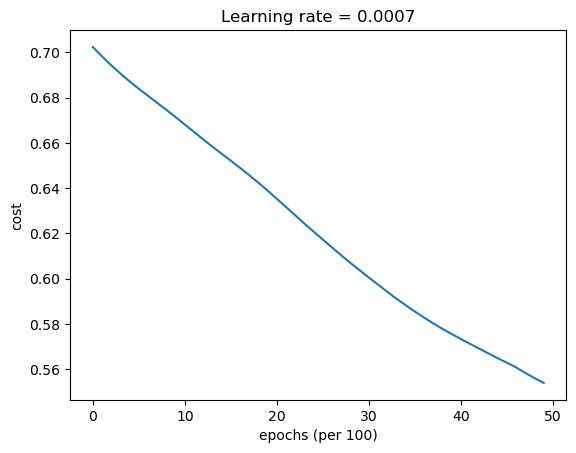

Accuracy: 0.7166666666666667


In [44]:
# Train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = 'gd')

# Predict
predictions = predict(train_X, train_Y, parameters)

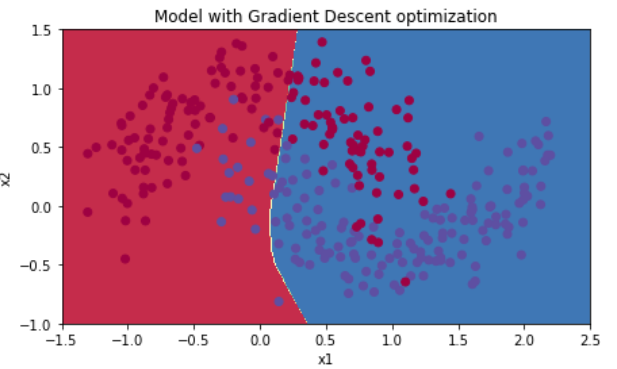

## 6.2 Mini-Batch Gradient Descent with Momentum
- To see how the model does with momentum. This example is relatively simple, the gains from using momentum are small - but for more complex problems we might see bigger gains.

Cost after epoch 0: 0.702413
Cost after epoch 1000: 0.668167
Cost after epoch 2000: 0.635388
Cost after epoch 3000: 0.600591
Cost after epoch 4000: 0.573444


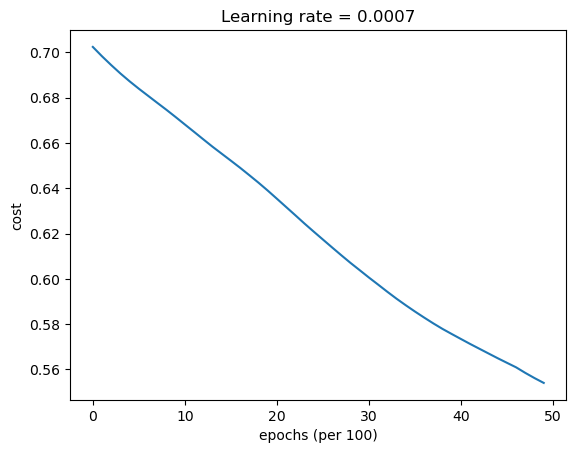

Accuracy: 0.7166666666666667


In [47]:
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, beta = 0.9, optimizer = "momentum")

# Predict
predictions = predict(train_X, train_Y, parameters)

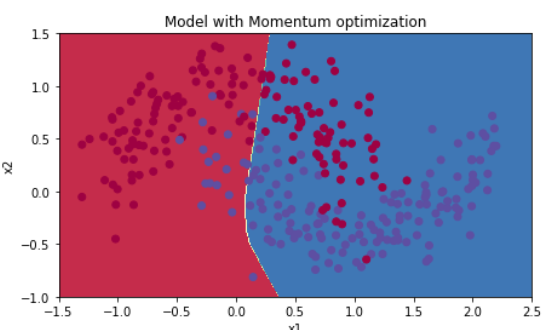

## 6.3 Mini-Batch with Adam
- To see how the model does with Adam

Cost after epoch 0: 0.702166
Cost after epoch 1000: 0.167845
Cost after epoch 2000: 0.141316
Cost after epoch 3000: 0.138788
Cost after epoch 4000: 0.136066


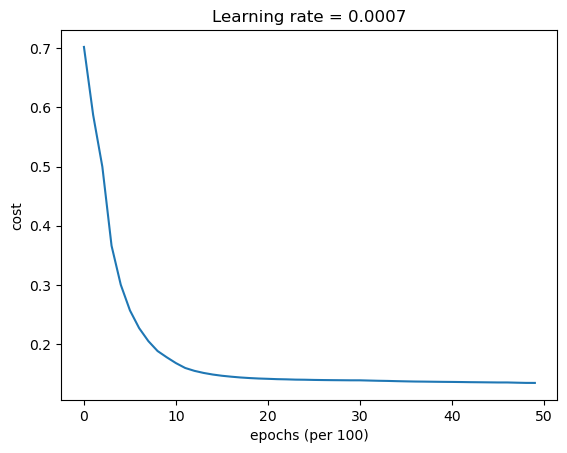

Accuracy: 0.9433333333333334


In [52]:
# Train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layer_dims, optimizer='adam')

# Predict
predictions = predict(train_X, train_Y, parameters)

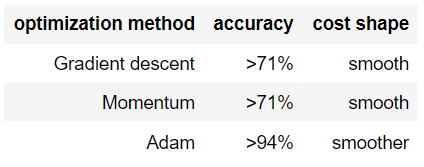

- Momentum usually helps, but given the small learning rate and the simplistic dataset, it's impact is almost negaligible.
- Adam clearly outperforms mini-batch gradient descent and Momentum. If we run the model for more epochs on the simple dataset, all three methods will lead to very good results. However, we've seen that Adam convergence a lot faster.
- Advantages of Adam include : 
    - Relatively low memory requirements (though higher than gradient descent and gradient descent with momentum)
    - Usually works well even with little tuning of hyperparameters (except alpha).

# 7. Learning Rate Decay and Scheduling
- The learning rate is another hyperparameter that can help us speed up learning.
- During the 1st part of training, our model can get away with taking large steps, using a fixed value for learning rate alpha can cause our model to get stuck in a wide osciallation that never quite convergence. But if we were slowly reduce our learning rate alpha over time, we could then take smaller, slower steps that bring us closer to the minimum. This is the idea behind learning rate decay.
- Learning rate decay can be achieved by using either adapative methods or pre-defined learning rate schedules.
- Now, we'll apply scheduled learning rate decay to a 3-layer neural network in 3 different optimizer models and see how each one differes, as well as the effect of scheduling at different epochs.
- The model is essentially the same as the one we used before, except in the one we'll be able to include learning rate decay. It includes 2 new parameters, decay and decay_rate.

In [53]:
def model(X, Y, layers_dims, optimier, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
         beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8, num_epochs = 5000, print_cost = True, decay = None, decay_rate = 1):
    '''
    3-layer neural network model which can be run in different optimizer modes.
    
    Arguments : 
    X : Input data, of shape (2, number of examples)
    Y : true 'label' vector (1 for blue fot / 0 for red dot), of shape (1, number of examples)
    layers_dims : Python list, containing the size of each layer
    learning_rate : The learning rate, scalar
    mini_batch_size : The size of a mini batch
    beta : Momentum hyperparameter
    beta1 : Exponential decay hyperparameter for the past gradients estimates
    beta2 : Exponential decay hyperparameter for the past squared gradients estimates
    epsilon : Hyperparameter preveting division by zero in Adam updates
    num_epochs : Number of epochs
    print_cost : True to print the cost every 1000 epochs
    
    Returns : 
    parameters : Python dictionary containing our updated parameters
    '''
    
    L = len(layers_dims) # number of layers in the neural networks
    costs = [] # To keep track of the cost
    t = 0 # initialize the counter required for Adam update
    seed = 10 # For grading puposes, so that our random minibatches are the same
    m = X.shape[1] # nmumber of training exqamples
    lr_rates = []
    learning_rate0 = learning_rate # The original learning rate
    
    # initialize parameters
    parameters = initialize_parameters(layer_dims)
    
    # initialie the optimizer
    if optimier == 'gd':
        pass # no initialization required for gradient descent
    elif optimier == 'momentum':
        v = initialize_velocity(parameters)
    elif optimier == 'adam':
        v, s = initialize_adam(parameters)
    
    # optimization loop
    for i in range(num_epochs):
        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        cost_total = 0
        
        for minibatch  in minibatches : 
            # select a minibatches
            (minibatch_X, minibatch_Y) = minibatch
            
            # Forward Propagation
            a3, caches = forward_propagation(minibatch_X, parameters)
            
            # Compute cost and add to the cost total
            cost_total += compute_cost(a3, minibatch_Y)
            
            # Backward propagation
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)
            
            # Update parameters
            if optimier == 'gd':
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimier == 'momentum':
                parameters, v = update_parameters_with_momentum(parameters,  grads, v, beta, learning_rate)
            elif optimier == 'adam':
                t = t + 1 # adam counter
                parameters, v,  s, _, _ = updated_parameters_with_adam(parameters, grads, v, s, t, learning_rate, beta1, beta2, epsilon)
                
        cost_avg = cost_total / m
                
        if decay :
            learning_rate = decay(learning_rate0, i, decay_rate)
        # print the cost every 1000 epoch
        if print_cost and i % 1000 == 0:
            print('Cost after epoch %i %f' %(i, cost_avg))
            if decay:
                print("learning rate after epoch %i: %f"%(i, learning_rate))
        if print_cost and i % 100 == 0:
            costs.append(cost_avg)
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters                    

## 7.1 Decay on every iteration
- For this portion of the assignment, we'll try one of the pre-defined schedules for learning rate decay, called exponential learning rate decay. It takes the mathematical form :
        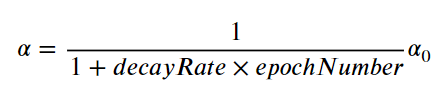'

In [54]:
def update_lr(learning_rate0, epoch_num, decay_rate):
    '''
    Calculates updated the learning rate using exponential weight decay.
    
    Arguments : 
    learning_rate0 : Original learning rate, scalar
    epoch_num : Epoch number. integer
    decay_rate : Decay rate. Scalar
    
    Returns :
    learning_rate : Updated learning rate. Scalar
    '''
    learning_rate = (1/(1 + decay_rate * epoch_num))*learning_rate0
    return learning_rate

In [55]:
learning_rate = 0.5
print("Original learning rate: ", learning_rate)
epoch_num = 2
decay_rate = 1
learning_rate_2 = update_lr(learning_rate, epoch_num, decay_rate)

print("Updated learning rate: ", learning_rate_2)

Original learning rate:  0.5
Updated learning rate:  0.16666666666666666


Cost after epoch 0 0.701091
learning rate after epoch 0: 0.100000
Cost after epoch 1000 0.661884
learning rate after epoch 1000: 0.000100
Cost after epoch 2000 0.658620
learning rate after epoch 2000: 0.000050
Cost after epoch 3000 0.656765
learning rate after epoch 3000: 0.000033
Cost after epoch 4000 0.655486
learning rate after epoch 4000: 0.000025


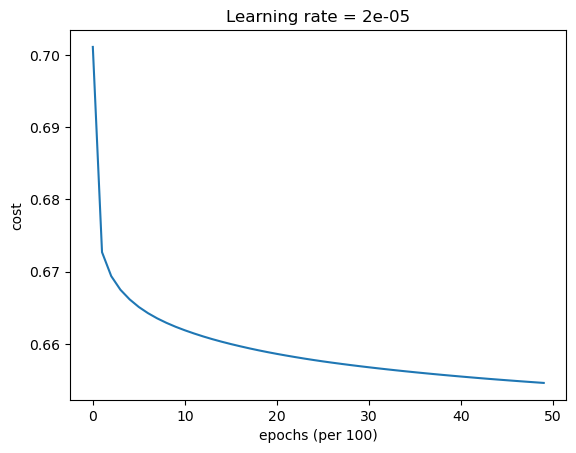

Accuracy: 0.6533333333333333


In [56]:
# Train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layer_dims, optimier='gd', learning_rate=0.1, num_epochs=5000, decay=update_lr)

# Preidct
predictions = predict(train_X, train_Y, parameters)

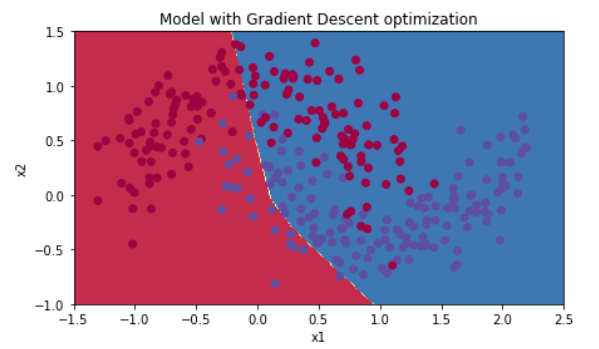

- If we set the decay to occur at every iteration, the learning rate goes to zero too quickly - even if we start with a higher learning rate.
    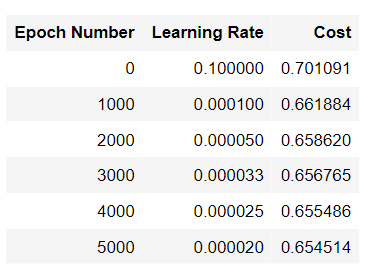
- When the number of epochs is large the optimization algorithm will stop updating. One common fix to the issue is to decay the learning rate every few steps. This is called fixed interval scheduling.

## 7.2 Fixed interval scheduling
- We can help prevent the learning rate speeding to zero too quickly by scheduling the expoential learning rate decay at a fixed time interval, for example 1000. We can either number the interval, or divide the epoch by the time interval, which is the size of window with the constant learning rate.
- 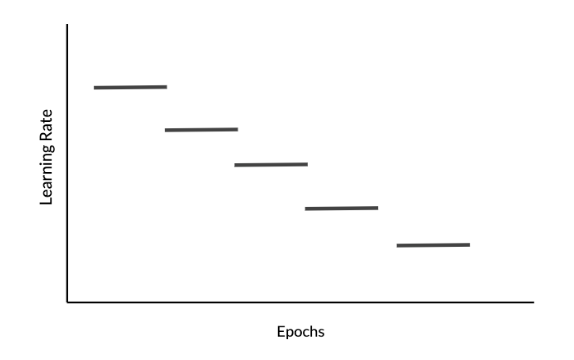
- The new learning rate using exponential weight decay with fixed interval scheduling. The learning rate scheduling such that if only changes when the epochNum is a multiple of the timeinterval. 
    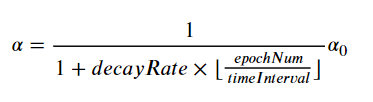

In [57]:
def schedule_lr_decay(learning_rate0, epoch_num, decay_rate, time_interval = 1000):
    '''
    Calculated updated the learning rate using exponential weight decay.
    
    Arguments :
    Learning_rate0 = Original learning rate. Scalar
    Epoch_num : Epoch number. Integer
    decay_rate : Decay rate. Scalar
    time_interval : Number of epochs where we update the learning rate.
    
    Returns :
    learning_rate : Updated learning rate. Scalar
    '''
    learning_rate = ( 1/(1+decay_rate*np.floor(epoch_num/time_interval)))*learning_rate0
    return learning_rate

In [58]:
learning_rate = 0.5
print("Original learning rate: ", learning_rate)

epoch_num_1 = 10
epoch_num_2 = 100
decay_rate = 0.3
time_interval = 100
learning_rate_1 = schedule_lr_decay(learning_rate, epoch_num_1, decay_rate, time_interval)
learning_rate_2 = schedule_lr_decay(learning_rate, epoch_num_2, decay_rate, time_interval)
print("Updated learning rate after {} epochs: ".format(epoch_num_1), learning_rate_1)
print("Updated learning rate after {} epochs: ".format(epoch_num_2), learning_rate_2)

Original learning rate:  0.5
Updated learning rate after 10 epochs:  0.5
Updated learning rate after 100 epochs:  0.3846153846153846


## 7.3 Using Learning Rate Decay for Each optimization Method
### 7.3.1 Gradient Descent with Learning Rate Decay
- To see how the model does gradient descent and weight decay.

Cost after epoch 0 0.701091
learning rate after epoch 0: 0.100000
Cost after epoch 1000 0.127161
learning rate after epoch 1000: 0.050000
Cost after epoch 2000 0.120304
learning rate after epoch 2000: 0.033333
Cost after epoch 3000 0.117033
learning rate after epoch 3000: 0.025000
Cost after epoch 4000 0.117512
learning rate after epoch 4000: 0.020000


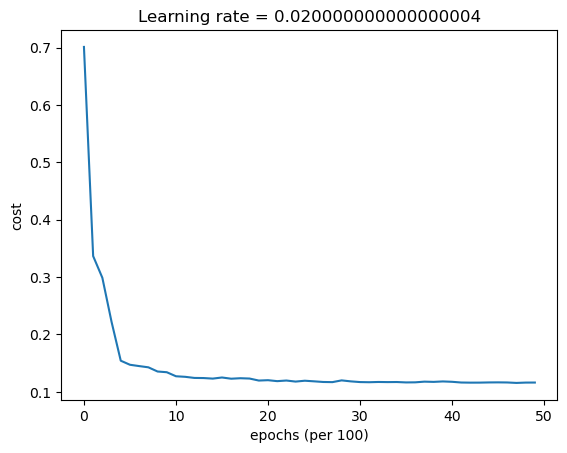

Accuracy: 0.9433333333333334


In [59]:
# Train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layer_dims, optimier='gd', learning_rate=0.1, num_epochs=5000, decay=schedule_lr_decay)

# Predict
predictions = predict(train_X, train_Y, parameters)

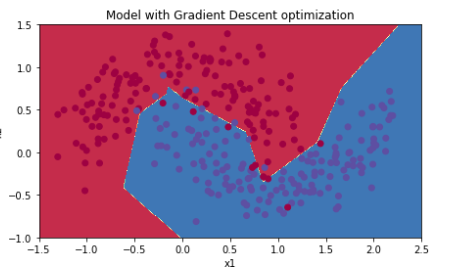

### 7.3.2 Gradient Descent with Momentum and Learning Rate Decay
- To see how does gradient descent with momentum and weight decay.

Cost after epoch 0 0.702226
learning rate after epoch 0: 0.100000
Cost after epoch 1000 0.128974
learning rate after epoch 1000: 0.050000
Cost after epoch 2000 0.125965
learning rate after epoch 2000: 0.033333
Cost after epoch 3000 0.123375
learning rate after epoch 3000: 0.025000
Cost after epoch 4000 0.123218
learning rate after epoch 4000: 0.020000


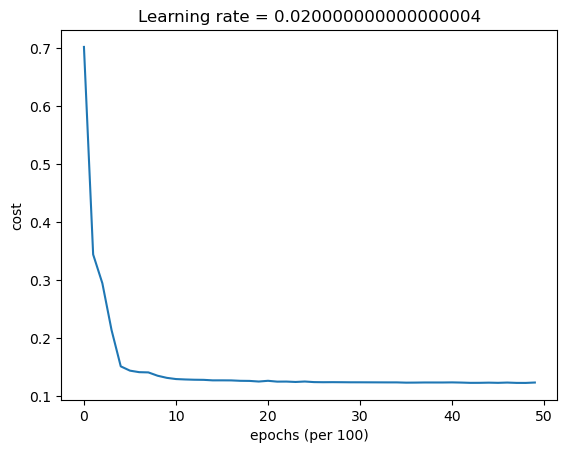

Accuracy: 0.9533333333333334


In [60]:
# Train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layer_dims, optimier='momentum', learning_rate=0.1, num_epochs=5000, decay=schedule_lr_decay)

# Predict
predictions = predict(train_X, train_Y, parameters)

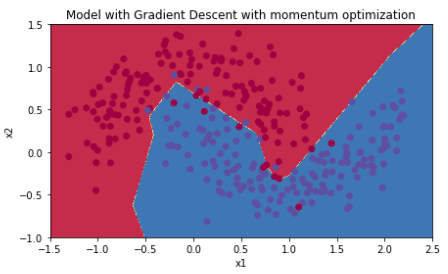

### 7.3.3 Adam with Learning Rate Decay
- To see how model does Adam and weight decay

Cost after epoch 0 0.615492
learning rate after epoch 0: 0.010000


C:\Users\surya\AppData\Local\Temp\ipykernel_12532\2302398172.py:11: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))
C:\Users\surya\AppData\Local\Temp\ipykernel_12532\3407357803.py:19: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
C:\Users\surya\AppData\Local\Temp\ipykernel_12532\3407357803.py:19: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after epoch 1000 0.695827
learning rate after epoch 1000: 0.005000
Cost after epoch 2000 0.705145
learning rate after epoch 2000: 0.003333
Cost after epoch 3000 0.696113
learning rate after epoch 3000: 0.002500
Cost after epoch 4000 0.693600
learning rate after epoch 4000: 0.002000


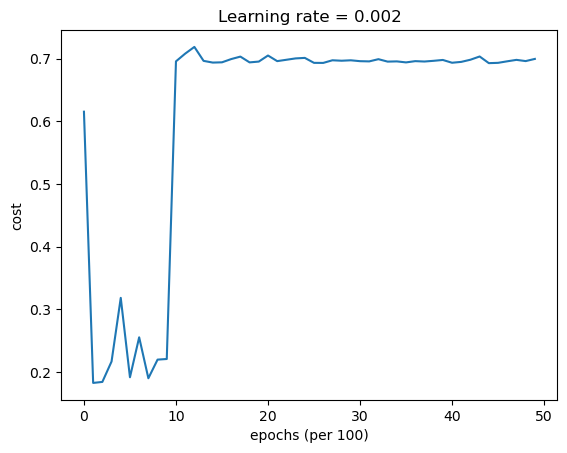

Accuracy: 0.5


In [63]:
# Train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimier= "adam", learning_rate = 0.01, num_epochs=5000, decay=schedule_lr_decay)

# Predict
predictions = predict(train_X, train_Y, parameters)

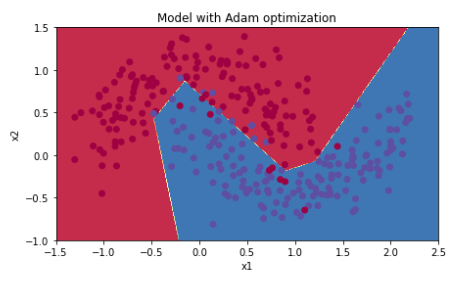

- With mini-batch GD or mini_batch GD with momentum, the accuracy is significantly lower then Adam, but when learning rate decay is added on top, either can achieve performance at a speed and accuracy score that's similar to Adam.